In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt  

img = cv2.imread("chess.jpg")
cv2.imshow('image',img)    
cv2.waitKey(0)    
cv2.destroyAllWindows()   

In [15]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)

cv2.imshow('dst',dst)
cv2.waitKey(0)    
cv2.destroyAllWindows()

In [16]:
dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
cv2.waitKey(0)    
cv2.destroyAllWindows()   

In [22]:
img = cv2.imread("chess.jpg", 0)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create(threshold=80,nonmaxSuppression=True,type=cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
kp = fast.detect(img,None)

img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
cv2.imshow('dst',img2)
cv2.waitKey(0)    
cv2.destroyAllWindows()
cv2.imwrite('fast_true.png',img2)

True

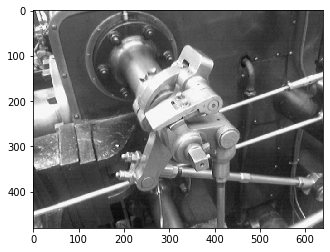

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt  

img = cv2.imread('wiki_canny.png',0)
plt.imshow(img,cmap = 'gray')
plt.show()

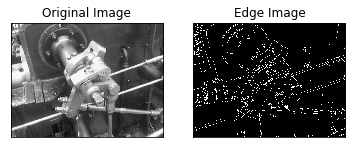

In [25]:
edges = cv2.Canny(img,100,200,True)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

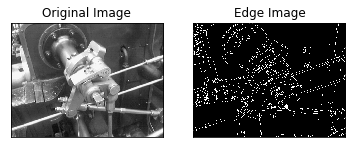

In [26]:
edges = cv2.Canny(img,100,150,True)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

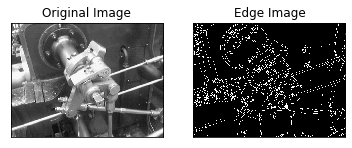

In [27]:
edges = cv2.Canny(img,50,150,True)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

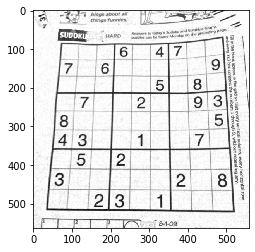

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt  

img = cv2.imread('dave.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'gray')
plt.show() 

In [29]:
import cv2
import numpy as np

img = cv2.imread('dave.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
cv2.imshow('dst',img)
cv2.waitKey(0)    
cv2.destroyAllWindows() 

cv2.imwrite('houghlines3.jpg',img)

True

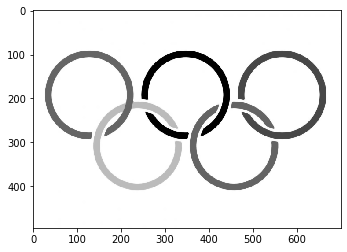

In [58]:
img = cv2.imread('Olympic.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

plt.imshow(cimg)
plt.show() 

In [ ]:
img = cv2.imread('Olympic.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=70,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()